# EXECUTIVE SUMMARY OF NIGERIA'S COVID-19 DATA

### Data Collection

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# COLLECTION OF DATA FROM NCDC WEBSITE
ncdc_covid_data1 =pd.read_html('https://covid19.ncdc.gov.ng/')
ncdc_covid_data = ncdc_covid_data1[0]

In [22]:
# DATA COLLECTED FROM JOHN HOPKINS REPOSITORY
#JOHN HOPKINS GLOBAL DATA CONFIRMED CASES = JHGDCC
JHGDCC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#JOHN HOPKINS GLOBAL DATA RECOVERED CASES = JHGDRC
JHGDRC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#JOHN HOPKINS GLOBAL DATA DEATH CASES =JHGDDC
JHGDDC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#NIGERIA DAILY DEATH CASES
JHGDDC.loc[JHGDDC['Country/Region']=='Nigeria'].T
#NIGERIA DAILY CONFIRMED CASES
JHGDCC.loc[JHGDCC['Country/Region']=='Nigeria'].T
#NIGERIA DAILY RECOVERED CASES
JHGDRC.loc[JHGDRC['Country/Region']=='Nigeria'].T

,189
Province/State,NaN
Country/Region,Nigeria
Lat,9.082
Long,8.6753
1/22/20,0
...,...
6/17/22,0
6/18/22,0
6/19/22,0
6/20/22,0


In [4]:
# DATA COLLECTED FROM OTHER SOURCES
covid_external = pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv')
Budget_data = pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv')
RealGDP= pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv')
covidNig = pd.read_csv('https://raw.githubusercontent.com/laplace125/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv')

In [5]:
#NIGERIA DAILY CONFIRMED CASES
Nigeria_daily_confirmed1 = JHGDCC.loc[JHGDCC['Country/Region']=='Nigeria'].T
Nigeria_daily_confirmed = Nigeria_daily_confirmed1.iloc[4: , :]
#RESET INDEX THEN RENAME TO DATE AND CASES
Nigeria_daily_confirmed.reset_index(inplace=True)
Nigeria_daily_confirmed.rename(columns = {'index' : 'Date' , 204:'Cases'} , inplace = True)
#NIGERIA DAILY RECOVERED CASES
Nigeria_daily_recovered1 = JHGDRC.loc[JHGDRC['Country/Region']=='Nigeria'].T
Nigeria_daily_recovered = Nigeria_daily_recovered1.iloc[4: , :]
#RESET INDEX THEN RENAME TO DATE AND CASES
Nigeria_daily_recovered.reset_index(inplace=True)
Nigeria_daily_recovered.rename(columns = {'index' : 'Date' , 189:'Cases'} , inplace=True)
#NIGERIA DAILY DEATH CASES
Nigeria_daily_death1 = JHGDDC.loc[JHGDDC['Country/Region']=='Nigeria'].T
Nigeria_daily_death = Nigeria_daily_death1.iloc[4: , :]
#RESET INDEX THEN RENAME TO DATE AND CASES
Nigeria_daily_death.reset_index(inplace=True)
Nigeria_daily_death.rename(columns = {'index' : 'Date' , 204:'Cases'} , inplace=True)

The top ten states interms of confirmed cases are: 
Lagos , FCT , Kaduna , Plateau , Oyo , Rivers , Edo , Ogun , Kano and Delta

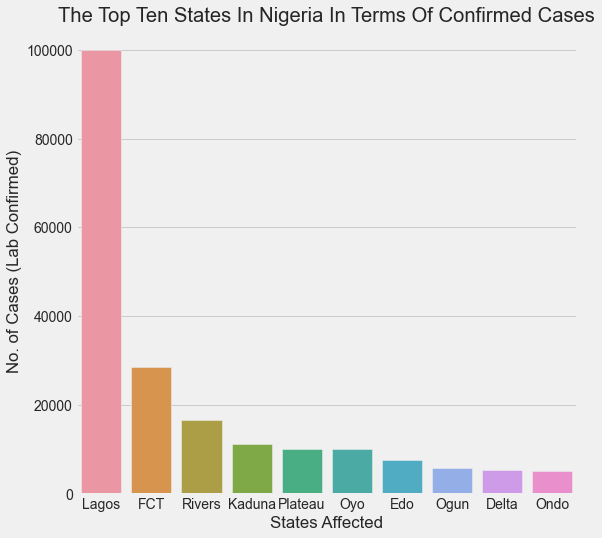

In [6]:
data =plt.subplots(figsize=(8, 8))
sns.barplot(x ='States Affected' ,y ='No. of Cases (Lab Confirmed)' ,  
            data = ncdc_covid_data.sort_values('No. of Cases (Lab Confirmed)' , ascending = False).head(10)).set_title('The Top Ten States In Nigeria In Terms Of Confirmed Cases')
plt.show()

Text(0.5, 1.0, 'Top 10 States In Terms Of Discharged Covid Cases')

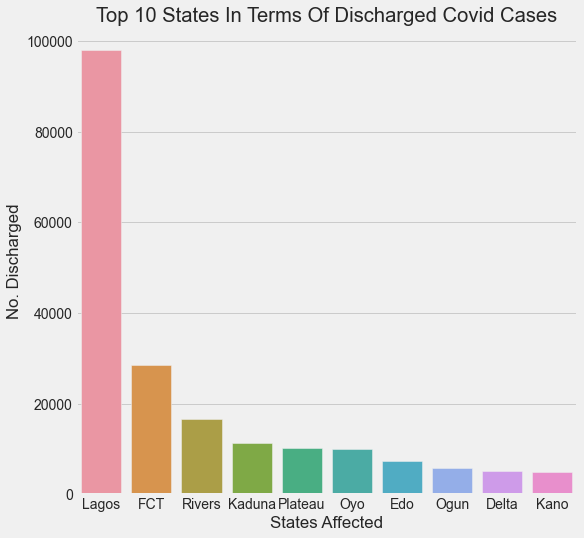

In [7]:
data = plt.subplots(figsize=(8,8))
sns.barplot(x ='States Affected' , y='No. Discharged' , 
            data = ncdc_covid_data.sort_values('No. Discharged', ascending = False).head(10)).set_title('Top 10 States In Terms Of Discharged Covid Cases')

Text(0.5, 1.0, 'Top 10 States In Terms Of Death Cases')

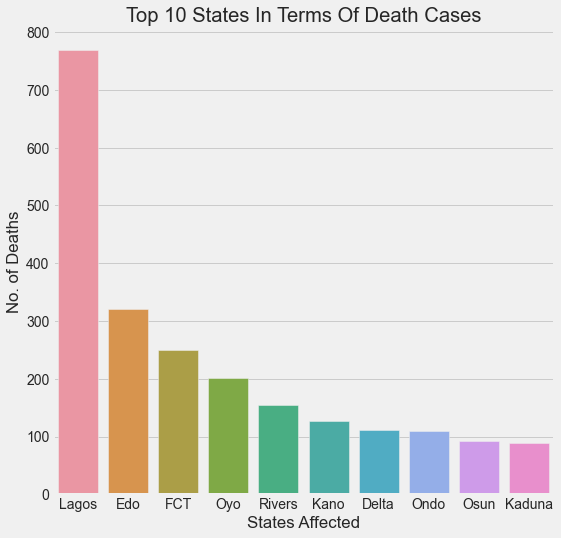

In [8]:
data = plt.subplots(figsize=(8,8))
sns.barplot(x ='States Affected' , y='No. of Deaths' , 
            data = ncdc_covid_data.sort_values('No. of Deaths', ascending = False).head(10)).set_title('Top 10 States In Terms Of Death Cases')

Text(0.5, 1.0, 'Trend of ummulative Daily Confirmed Cases In Nigeria According to Dates')

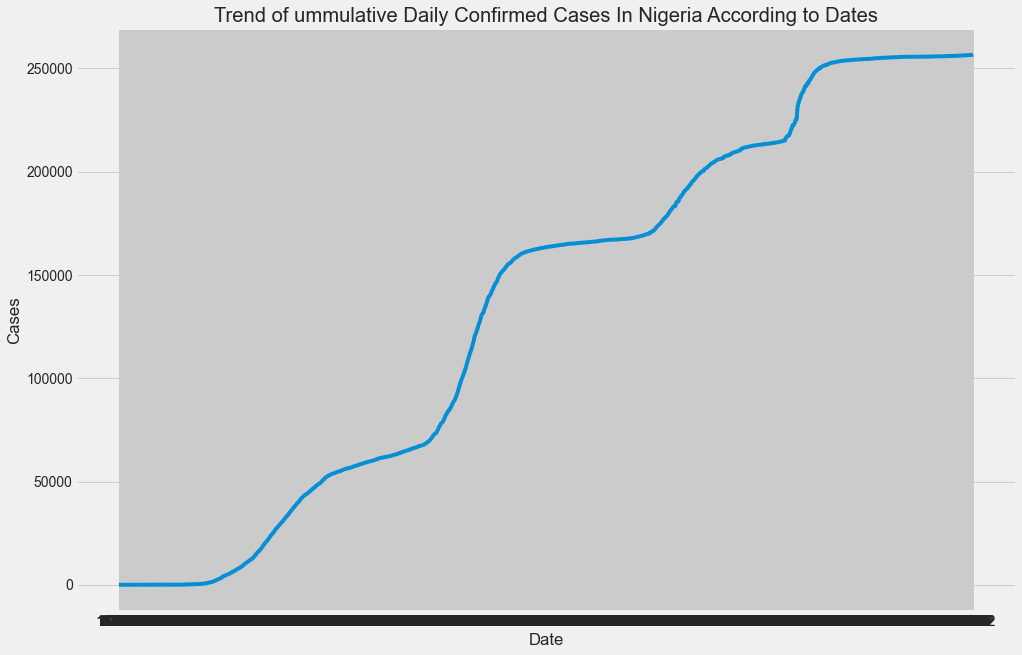

In [9]:
data = plt.subplots(figsize=(15,10))
sns.lineplot(y='Cases' , x = 'Date' ,data = Nigeria_daily_confirmed).set_title('Trend of ummulative Daily Confirmed Cases In Nigeria According to Dates')

Text(0.5, 1.0, 'Cummulative Daily Recovered Cases Of Covid Cases In Nigeria')

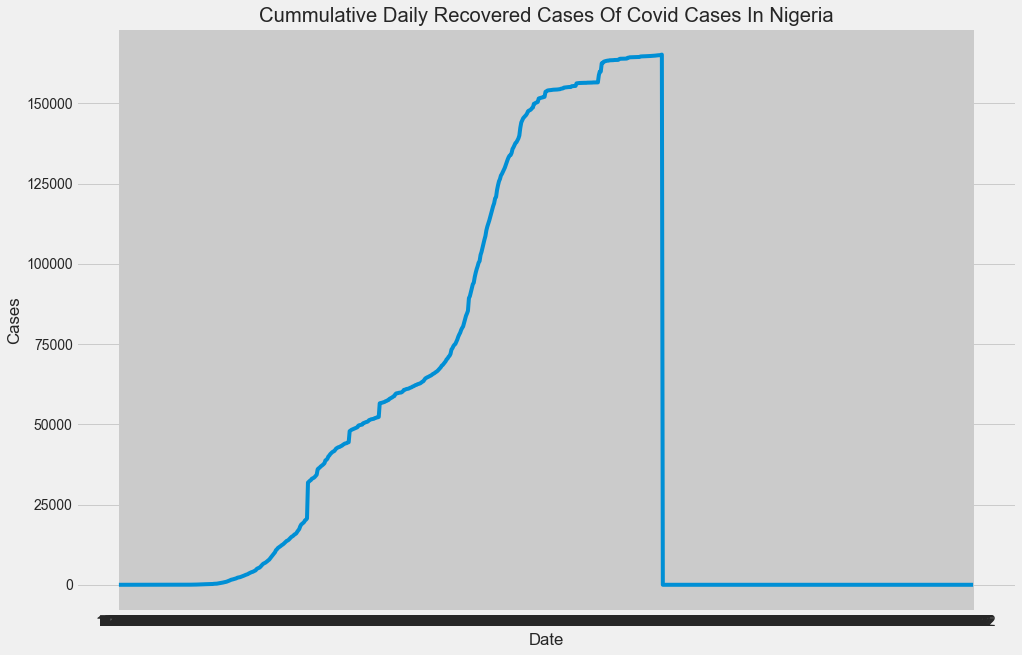

In [10]:
data = plt.subplots(figsize=(15,10))
sns.lineplot(x= 'Date' , y = 'Cases' ,data = Nigeria_daily_recovered).set_title('Cummulative Daily Recovered Cases Of Covid Cases In Nigeria')

Text(0.5, 1.0, 'Cummulative Daily Death Cases Of Covid Cases In Nigeria')

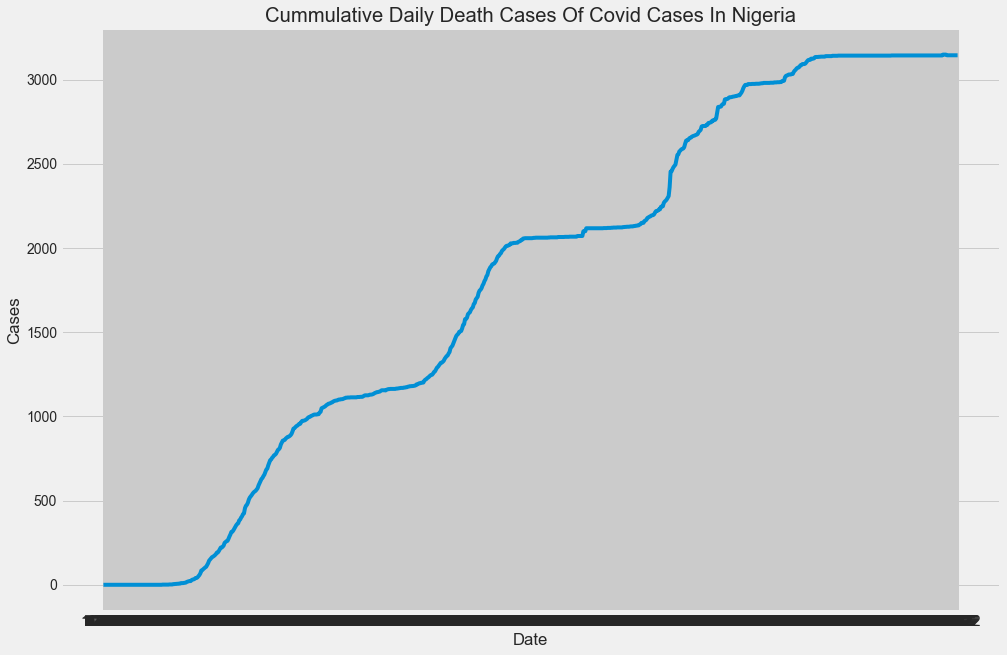

In [11]:
data = plt.subplots(figsize=(15,10))
sns.lineplot(x= 'Date' , y = 'Cases' ,data = Nigeria_daily_death).set_title('Cummulative Daily Death Cases Of Covid Cases In Nigeria')

In [12]:
Nigeria_daily_confirmed['Daily_Infection'] =Nigeria_daily_confirmed[['Cases']].diff()

In [13]:
print(Nigeria_daily_confirmed[(Nigeria_daily_confirmed.Daily_Infection)== Nigeria_daily_confirmed.Daily_Infection.max()])

         Date   Cases Daily_Infection
700  12/22/21  231413            6158


In [14]:
merged_covid = ncdc_covid_data.merge(covid_external , left_on='States Affected' , right_on='states')

In [15]:
largest_ten = merged_covid.nlargest(10 , 'No. of Cases (Lab Confirmed)')

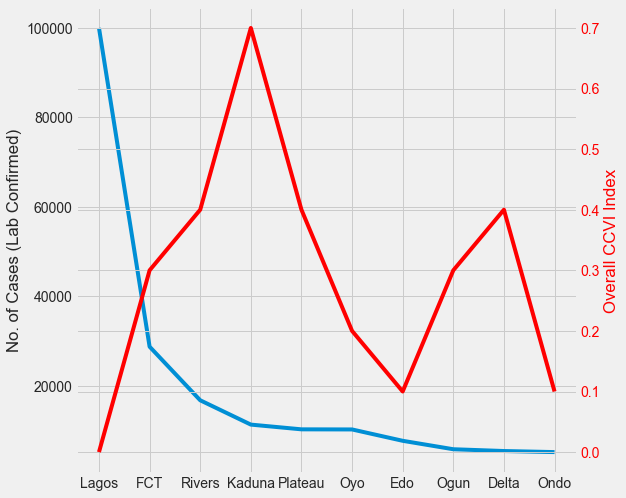

In [16]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot()
ax1.plot(largest_ten.loc[: , 'States Affected'] , largest_ten.loc[: , 'No. of Cases (Lab Confirmed)'])
ax1.set_ylabel('No. of Cases (Lab Confirmed)')

ax2 = ax1.twinx()
ax2.plot(largest_ten.loc[: , 'States Affected'], largest_ten.loc[: , 'Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig('Confirmed_CCVI.png')

### Regression plot of Number of cases(Lab confirmed) to the number of deaths

<AxesSubplot:xlabel='No. of Deaths', ylabel='No. of Cases (Lab Confirmed)'>

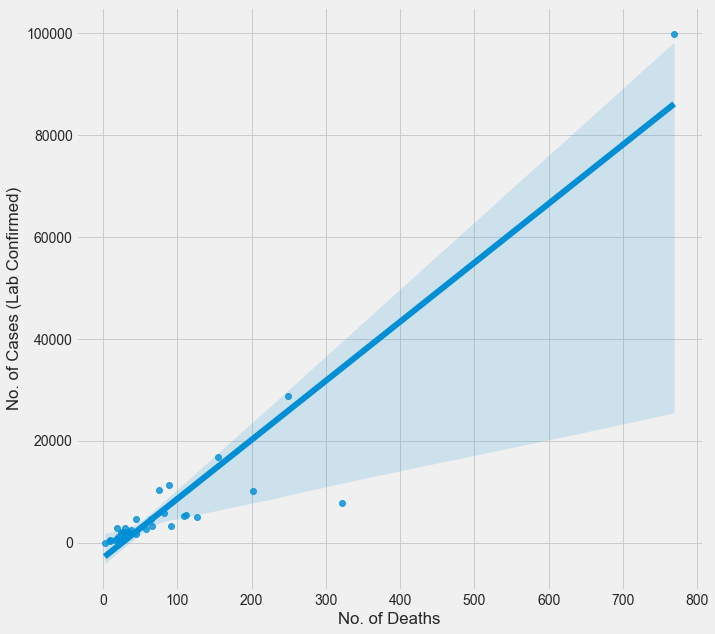

In [17]:
data = plt.subplots(figsize=(10,10))
sns.regplot(y ='No. of Cases (Lab Confirmed)' , x= 'No. of Deaths',  data = merged_covid , fit_reg= True)

### Regression plot of Number of Deaths to the number of Health System Rating

<AxesSubplot:xlabel='Health System', ylabel='No. of Deaths'>

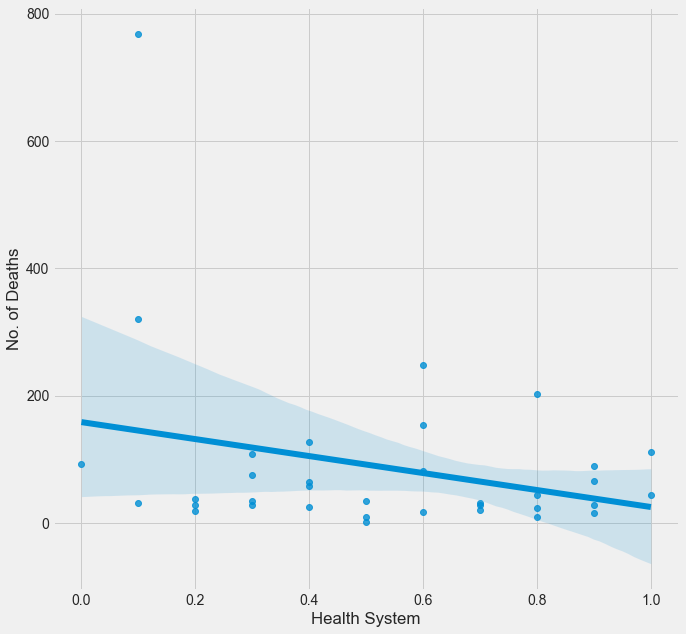

In [18]:
data = plt.subplots(figsize=(10,10))
sns.regplot(y ='No. of Deaths' , x= 'Health System',  data = merged_covid , fit_reg= True)

### Bar Plot of Q1,Q2,Q3 and Q4 GDP FOR THE YEARS 2014-2020

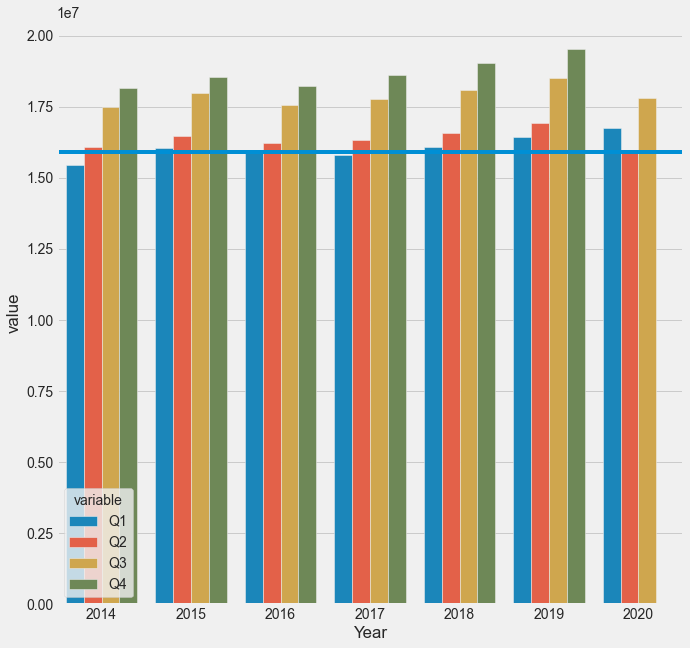

In [19]:
RealGDP_melt = pd.melt(RealGDP, id_vars =['Year'])
data = plt.subplots(figsize=(10,10))
sns.barplot(x="Year" , y= "value" , hue="variable" ,data=RealGDP_melt).axhline(y=15890000)
plt.legend(loc='lower left', title='variable')

In [20]:
#Adding some new columns to merged_covid dataframe
merged_covid['%cases confirmed'] = merged_covid['No. of Cases (Lab Confirmed)']/252197* 100
merged_covid['%No. of Deaths'] = merged_covid['No. of Deaths']/3079 * 100
merged_covid['case-to-population per million']=merged_covid['No. of Cases (Lab Confirmed)']/merged_covid['Population']*1000000

### PLOT OF "percentage number of confirmed cases to total number of confirmed cases" and
###        "Percentage number of death of each state to the overall number of deaths" on the same axis

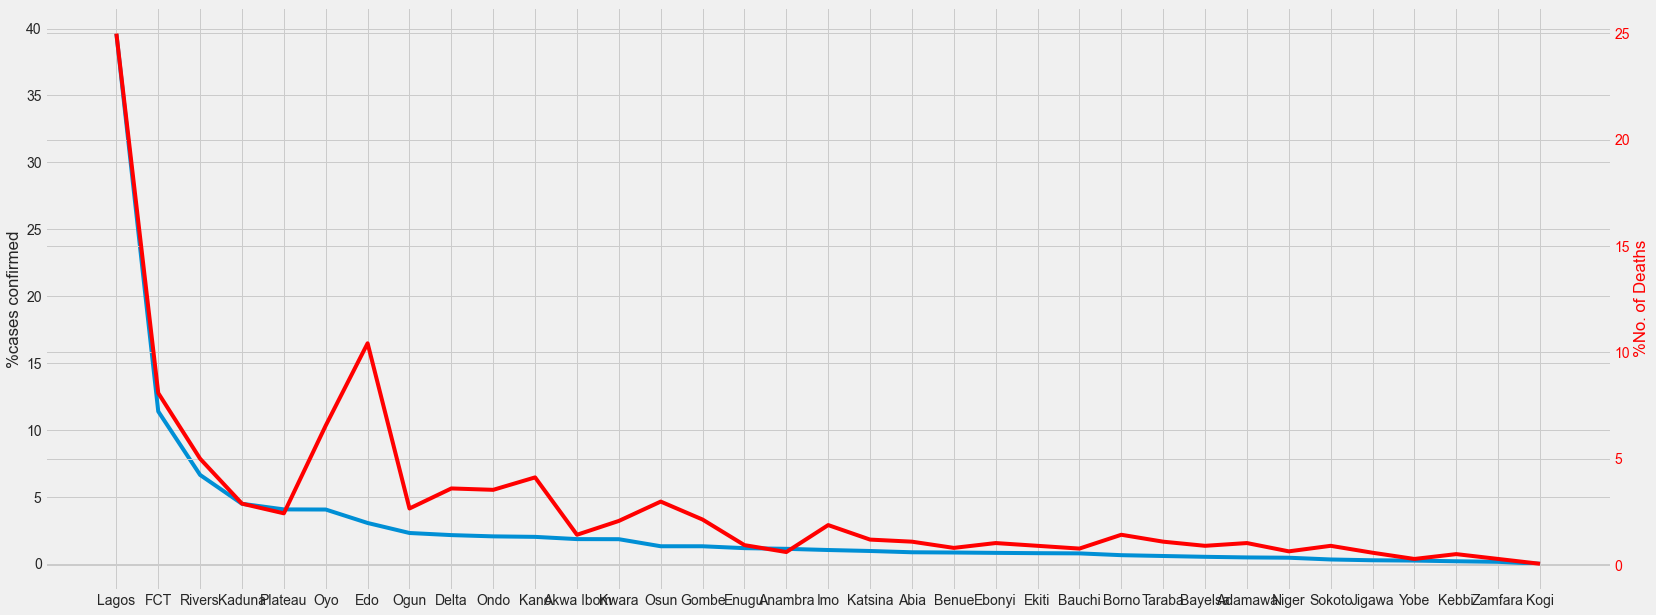

In [21]:
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot()
ax1.plot(merged_covid.loc[: , 'States Affected'] , merged_covid.loc[: , '%cases confirmed'])
ax1.set_ylabel('%cases confirmed')

ax2 = ax1.twinx()
ax2.plot(merged_covid.loc[: , 'States Affected'], merged_covid.loc[: , '%No. of Deaths'], 'r-')
ax2.set_ylabel('%No. of Deaths', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig('% CONFIRMED VS % DEATH.png')

# SUMMARY
Data used for this analysis was scraped on th NCDC official website(https://covid19.ncdc.gov.ng), John Hopkins data repository on Github , and some other external sources.

Covid data was analysed for 36 states and the FCT, Abuja.

Data including but not limited to Number of Laboratory confirmed cases, Number of cases on admission , Number of Patients discharged and Number of deaths were analysed.

Based on our analysis, we can deduce the following:

The top ten States in Nigeria in terms of Laboratory Confirmed cases of Covid 19 are: Lagos , FCT , Kaduna , Plateau,
Oyo , Edo , Ogun and Ondo State.
Lagos state has Laboratory confirmed cases as much as the total of second Highest state till the fifth Highest Cases.


Lagos also tops the list of states having the highest Deaths followed by Edo State which is the tenth highest state with 
Laboratory confirmed cases. It is probable that EDo state do not have enough Facilities to test individuals for Covid-19.
Maximum infection rate for a day is 6158 cases , it happened on 22nd December , 2021

### Regression Relationships
* There exist a positive relationship between Number of cases confirmed and the population density. 
This means that the higher the population ,the higher the number of cases

* A high degree of relationship exists between the Number of cases and the number of deaths.
This implies that the higher the number of cases , the higher will be the number of deaths.

* An inverse relationship exists between the number of deaths and the status of health system in each state.
This shows that the number of deaths reduces when the health system is better.

* The regression plot of number of cases confirmed and the number of deaths shows a positive relationship.
That is , The higher the number of cases, the higher the number of deaths.
However the lineplots of "percentage number of confirmed cases to total number of confirmed cases" and
"Percentage number of death of each state to the overall number of deaths" on the same axis shows a similar trend,
but some states such as Oyo , Edo have a disturbing outlier spike in the percentage number of deaths,  Kano ,Osun , Imo , Borno 
also showed spikes in the percentage number of deaths, this is expected to be caused by some other factors.

### Percentage confirmed cases and Percentage total death
* Lagos State has about 39% of the total confirmed cases , 25%[quarter] of the total deaths.
* Abuja has about 11% of total confirmed cases and about 8% of the total deaths.
* Other states also followed a similar trend of having percentage of confirmed cases higher than 
  the percentage death, however , some states such as Rivers , Edo , kano ,Delta,Katsina and some few states have 
  a higher percentage of deaths than percentage confirmed cases.


### Comparing the Q2 GDP of 2019 with Q2 of 2020.
There is a drastic reduction of GDP between the two quarters.
Also, Q3 GDP of 2019 and Q3 GDP of 2020 shows that there is reduction in GDP.
Since GDP is affected by the rate of overall economic activities in a the country,
The Covid-19 pandemic , coupled with the imposition of lockdown and restriction of international and domestic travel,
has caused a decrease in GDP between the second quarter of 2019 and tthird quarter of 2020,
this implies that Covid-19 pandemic have negative effect on the GDP of Nigeria.



### Number of confirmed cases per million people.
* Lagos lead with about 7101 confirmed cases per one million persons.
* Abuja has about 5889 confirmed cases to one million person
* Plateau followed with 2151 confirmed cases per million, 
* This makes Lagos , Abuja and Plateau state the highest interms of cases confirmed per million.
* While Kogi state has 1 confirmed case per million , the least confirmed-cases-per-milion

The negative impact of Covid-19 on all states in Nigeria is much to the extent that the state with the least decrease in budget,Katsina state, has a reduction in budget to the extent of 31 billion Naira, that is about 13 percent decrease.

The list of the first five states most affected by budget reduction due to covid-19 are: 
Cross-river , Lagos ,Akwa Ibom , Rivers  and Ogun State
* Cross-River was reduced by 952.9 billion Naira ,which is about 87% budget reduction ,
* Lagos State downwardly revised its budget by 759.5 billion Naira , that is 45.2%reduction,
* Imo state's budget was reduced by 231.73 billion Naira , which amount to 38.76 % reduction in their budget.

# Conclusion

We can emphatically say that Covid-19 pandemic affected Nigeria and Nigerians negatively.